# 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/takahashihideyuki/dive/diveintocode-ml/Week4/train.csv", encoding="utf-8")

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# GrLivArea: Above grade (ground) living area square feet（グレード（地上）のリビングエリアの平方フィート）
# YearBuilt: Original construction date（元の建設日）

X = df[["GrLivArea", "YearBuilt"]] #データを抜き出し
X.info() #欠損値無しを確認
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000
...,...,...
1455,1647,1999
1456,2073,1978
1457,2340,1941
1458,1078,1950


In [4]:
# SalePrice: the property's sale price in dollars. This is the target variable that you're trying to predict.（資産のドルでの販売価格。 これは、予測しようとしているターゲット変数です。）

y = df["SalePrice"] #目的変数を抜き出し
display(y.isnull().sum()) #欠損値無しを確認
y

0

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。<br>
sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation<br>
評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。<br>
sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation<br>
可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### データを簡単に分析

In [6]:
df[["GrLivArea", "YearBuilt", "SalePrice"]].describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


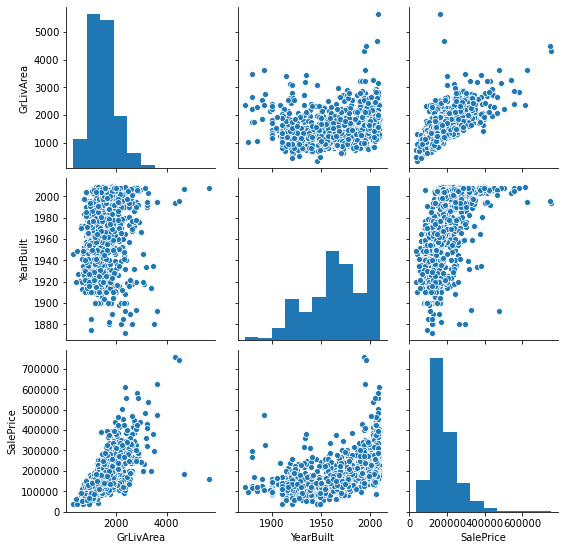

In [7]:
# 散布図行列
sns.pairplot(df[["GrLivArea", "YearBuilt", "SalePrice"]])

In [8]:
# 相関係数行列
corr_df = df[["GrLivArea", "YearBuilt", "SalePrice"]].corr(method='pearson')
corr_df

,GrLivArea,YearBuilt,SalePrice
GrLivArea,1.000000,0.199010,0.708624
YearBuilt,0.199010,1.000000,0.522897
SalePrice,0.708624,0.522897,1.000000


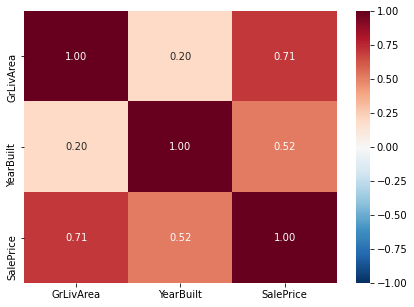

In [9]:
# 相関係数行列のヒートマップ
fig, ax = plt.subplots(figsize=(7,5))
g = sns.heatmap(corr_df, vmin=-1.0, vmax=1.0, center=0, annot=True, fmt='.2f', cmap="RdBu_r")

plt.show()

- SalePriceとGrLivAreaに割と高い相関が見られる。

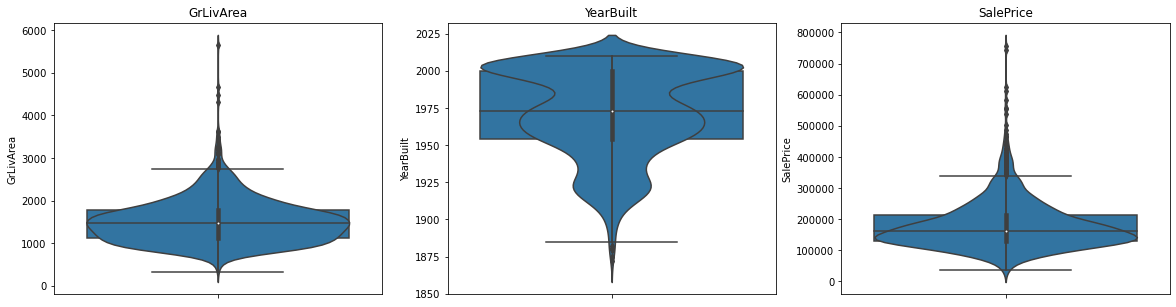

In [10]:
#箱ひげ図とバイオリン図
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131, title='GrLivArea')
ax1 = sns.boxplot(y="GrLivArea", data=df[["GrLivArea", "YearBuilt", "SalePrice"]])
ax1 = sns.violinplot(y="GrLivArea", data=df[["GrLivArea", "YearBuilt", "SalePrice"]])

ax2 = fig.add_subplot(132, title='YearBuilt')
ax2 = sns.boxplot(y="YearBuilt", data=df[["GrLivArea", "YearBuilt", "SalePrice"]])
ax2 = sns.violinplot(y="YearBuilt", data=df[["GrLivArea", "YearBuilt", "SalePrice"]])

ax3 = fig.add_subplot(133, title='SalePrice')
ax3 = sns.boxplot(y="SalePrice", data=df[["GrLivArea", "YearBuilt", "SalePrice"]])
ax3 = sns.violinplot(y="SalePrice", data=df[["GrLivArea", "YearBuilt", "SalePrice"]])

- 全てに外れ値があるが、GrLivAreaとSalePriceは外れ値が多い。

### 前処理

In [11]:
# 訓練データと検証データの分割。訓練データ75%、検証データ25%として分割する。
from sklearn.model_selection import train_test_split

In [12]:
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(1095, 2)

(365, 2)

(1095,)

(365,)

In [13]:
#標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
scaler.fit(X_train) #訓練用のデータでfit
X_train_std = scaler.transform(X_train) #訓練用データをtransform
X_train_std

array([[-0.61368407, -0.28203461],
       [-1.52093745, -0.77301696],
       [-0.55998949,  0.63446578],
       ...,
       [ 1.17860423, -0.08564167],
       [-1.39132982,  0.04528696],
       [-0.55813795, -0.9694099 ]])

In [15]:
X_test_std = scaler.transform(X_test) #検証用データをtransform
X_test_std

array([[ 9.54568190e-01,  9.94519498e-01],
       [ 4.71316902e-01, -2.31142832e+00],
       [ 3.49115427e-01,  1.09271597e+00],
       [ 1.06936352e+00,  8.96323029e-01],
       [ 7.13848024e-02, -8.38481272e-01],
       [ 1.95417524e-02,  1.09271597e+00],
       [ 1.72665933e+00,  1.09271597e+00],
       [-9.98803873e-01,  1.43483426e-01],
       [-7.24776323e-01, -2.49302453e-01],
       [-7.39588623e-01,  1.19091244e+00],
       [-7.50697848e-01,  1.09271597e+00],
       [ 7.32383690e-01,  6.99930089e-01],
       [-8.28462423e-01,  1.12544812e+00],
       [-1.05805307e+00, -8.56416701e-02],
       [ 1.54335712e+00,  3.07144209e-01],
       [ 1.49149377e-01, -4.45695393e-01],
       [ 4.65762290e-01, -3.47498923e-01],
       [ 1.18786192e+00,  1.19091244e+00],
       [ 4.60207677e-01,  1.19091244e+00],
       [ 1.69516290e-01, -2.16570297e-01],
       [-8.61790098e-01, -5.29095134e-02],
       [ 2.67647777e-01,  1.76215583e-01],
       [-8.87711623e-01, -6.74820489e-01],
       [-6.

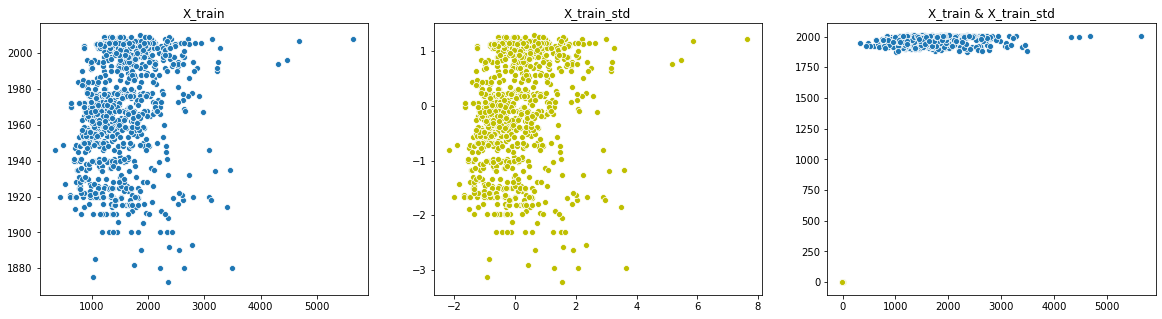

In [16]:
# 標準化前後でのデータ比較
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131, title='X_train')
ax1 = sns.scatterplot(X_train[:, 0], X_train[:, 1])

ax2 = fig.add_subplot(132, title='X_train_std')
ax2 = sns.scatterplot(X_train_std[:, 0], X_train_std[:, 1], color="y")

ax3 = fig.add_subplot(133, title='X_train & X_train_std')
ax3 = sns.scatterplot(X_train[:, 0], X_train[:, 1])
ax3 = sns.scatterplot(X_train_std[:, 0], X_train_std[:, 1], color="y")

### 線形回帰 による学習と推定

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression().fit(X_train_std, y_train) #学習
y_pred_lin = reg.predict(X_test_std) #推定
y_pred_lin #結果

array([260189.04102669, 128045.02283478, 233296.21297939, 262685.50595218,
       156330.13675995, 216909.22190134, 301790.15321574, 135232.08090553,
       136011.76584453, 182375.26880079, 178611.53488747, 239507.54102852,
       175815.39596288, 124792.92365045, 266985.13278007, 173042.18387056,
       191996.10614275, 278211.5480831 , 242031.2812647 , 181548.04442542,
       135621.92337503, 199272.77075996, 113994.42386711, 122572.08204392,
       242237.00023894, 166341.94041929, 206009.75590811, 224905.90292838,
       106355.1920911 , 148914.99480662, 148429.30403502, 210730.28707067,
       133202.93590321, 194274.72300121, 237025.660397  , 214147.36947245,
       170645.35380166, 288322.63218049, 156989.15328732,  88417.17367337,
       134957.78893988, 222422.12901962, 181409.00516536, 183386.05474747,
       194635.39688278, 112315.7169308 , 238164.68786426, 235664.4363843 ,
       242928.40998478,  99072.84764218, 223961.79669587, 197357.84490818,
       138889.16877726, 1

### 評価

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
#検証データと推定結果の平均二乗誤差
mean_squared_error(y_test, y_pred_lin)

1983765930.598885

### 可視化

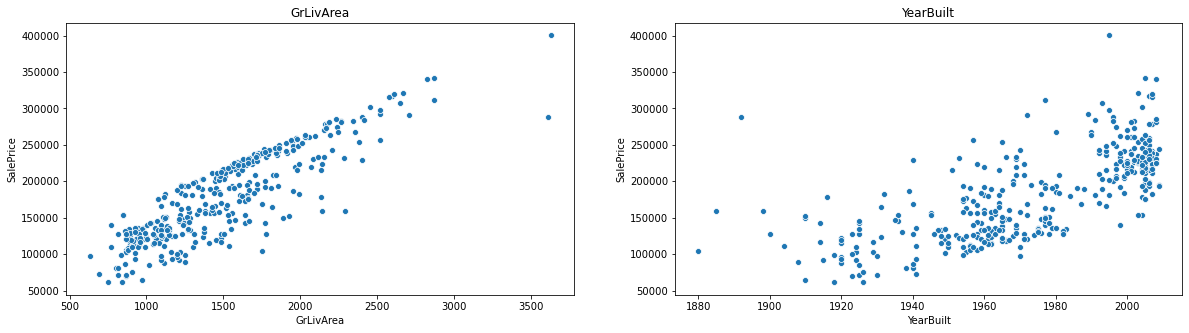

In [21]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(121, title='GrLivArea', xlabel='GrLivArea', ylabel='SalePrice')
ax1 = sns.scatterplot(X_test[:, 0], y_pred_lin)

ax2 = fig.add_subplot(122, title='YearBuilt', xlabel='YearBuilt', ylabel='SalePrice')
ax2 = sns.scatterplot(X_test[:, 1], y_pred_lin)

### 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。
- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

### ・SVM

In [22]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

In [23]:
regr = SVR(C=1.0, kernel='linear', epsilon=0.1)
regr.fit(X_train_std, y_train) #学習
y_pred_svm = regr.predict(X_test_std) #推定
y_pred_svm #結果

array([162945.7767122 , 160647.09268938, 162639.79029521, 162955.48450603,
       161299.75101557, 162440.78050305, 163471.60650512, 161249.63044391,
       161176.65836523, 162041.99738522, 161975.67896632, 162632.7821364 ,
       161948.59167419, 161074.76288075, 162884.03949438, 161585.14927689,
       161835.94306492, 163205.86925958, 162766.48247128, 161736.5381567 ,
       161213.14440457, 162034.23477596, 160819.9605325 , 160718.02867869,
       162727.76036686, 161757.97166761, 162260.32277719, 162503.54484862,
       160782.14740185, 161422.67097647, 161348.0718429 , 162386.35140761,
       161115.06658766, 162200.24898359, 162712.56239818, 162407.23952684,
       161796.49379632, 162538.6037717 , 161397.06529896, 160303.23860627,
       161301.25991647, 162528.34154021, 161707.3693228 , 161999.31217298,
       161984.78683302, 160840.79411628, 162719.52510459, 162599.85017039,
       162763.637396  , 160418.90498026, 162478.33912253, 162210.2112886 ,
       161225.34277465, 1

In [24]:
#検証データと推定結果の平均二乗誤差
mean_squared_error(y_test, y_pred_svm)

6375294754.312985

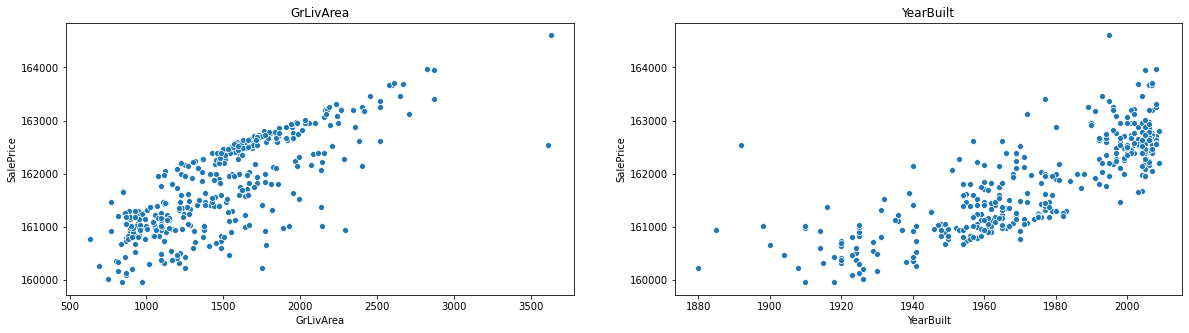

In [25]:
#可視化
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(121, title='GrLivArea', xlabel='GrLivArea', ylabel='SalePrice')
ax1 = sns.scatterplot(X_test[:, 0], y_pred_svm)

ax2 = fig.add_subplot(122, title='YearBuilt', xlabel='YearBuilt', ylabel='SalePrice')
ax2 = sns.scatterplot(X_test[:, 1], y_pred_svm)

### ・決定木

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train_std, y_train) #学習
y_pred_dtc = regressor.predict(X_test_std) #推定
y_pred_dtc #結果

array([284000.        , 138887.        , 133750.        , 240000.        ,
       152000.        , 214000.        , 267000.        , 135875.        ,
       139000.        , 155000.        , 155000.        , 215000.        ,
       145000.        , 111000.        , 142953.        , 117000.        ,
       145000.        , 415298.        , 227875.        , 119000.        ,
       138500.        , 163500.        ,  98766.66666667, 137500.        ,
       237000.        , 144000.        , 217000.        , 173000.        ,
       123750.        , 148000.        , 174900.        , 179540.        ,
       132500.        , 164500.        , 245350.        , 184000.        ,
       153900.        , 295000.        , 143750.        , 116000.        ,
       112500.        , 209500.        , 145000.        , 164000.        ,
       205000.        , 139000.        , 297000.        , 189000.        ,
       213500.        , 139000.        , 200500.        , 164990.        ,
       180500.        , 1

In [28]:
#検証データと推定結果の平均二乗誤差
mean_squared_error(y_test, y_pred_dtc)

2396611387.3850837

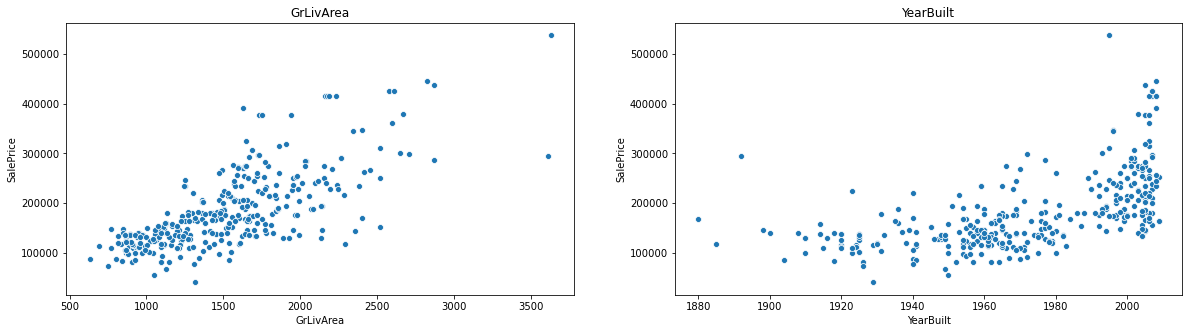

In [29]:
#可視化
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(121, title='GrLivArea', xlabel='GrLivArea', ylabel='SalePrice')
ax1 = sns.scatterplot(X_test[:, 0], y_pred_dtc)

ax2 = fig.add_subplot(122, title='YearBuilt', xlabel='YearBuilt', ylabel='SalePrice')
ax2 = sns.scatterplot(X_test[:, 1], y_pred_dtc)

### ・ランダムフォレスト

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
regr_rf = RandomForestRegressor(max_depth=2, random_state=0)
regr_rf.fit(X_train_std, y_train) #学習
y_pred_rf = regr_rf.predict(X_test_std) #推定
y_pred_rf #結果

array([287058.29846718, 163871.4872812 , 227954.06801724, 291085.98316335,
       149759.78405125, 212774.78221098, 308037.36350106, 130748.53911562,
       127807.40071194, 198742.13804235, 198742.13804235, 251408.21543784,
       198742.13804235, 127807.40071194, 197872.14513703, 150359.06909956,
       163871.4872812 , 298484.2170835 , 234912.77140152, 151435.13867395,
       127807.40071194, 157439.86849914, 127807.40071194, 138352.06643503,
       255411.27616038, 193929.47938449, 208836.31537989, 227609.63971053,
       127807.40071194, 130748.53911562, 127807.40071194, 199776.93085848,
       127807.40071194, 198742.13804235, 231438.285536  , 209789.82066516,
       193929.47938449, 198873.84742424, 129925.35121969, 127807.40071194,
       144282.16938377, 215629.10540226, 157439.86849914, 198742.13804235,
       151480.15840168, 127807.40071194, 231438.285536  , 255788.84911404,
       240340.17239318, 127807.40071194, 227609.63971053, 198742.13804235,
       127807.40071194, 1

In [32]:
#検証データと推定結果の平均二乗誤差
mean_squared_error(y_test, y_pred_rf)

2555364507.4243336

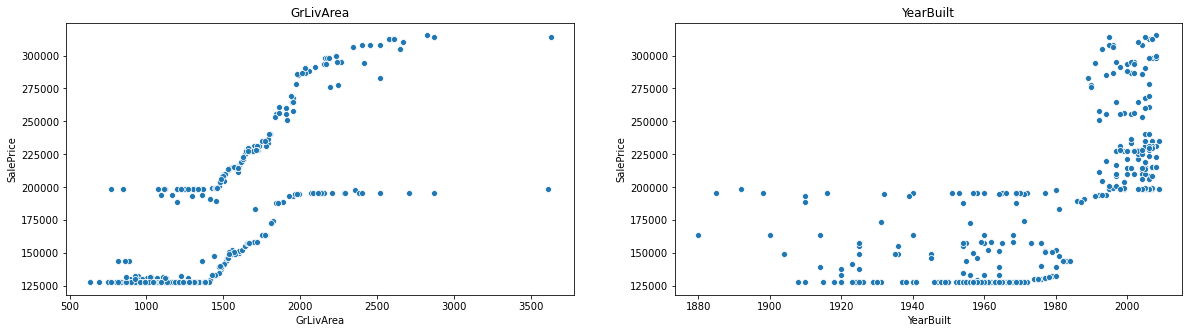

In [33]:
#可視化
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(121, title='GrLivArea', xlabel='GrLivArea', ylabel='SalePrice')
ax1 = sns.scatterplot(X_test[:, 0], y_pred_rf)

ax2 = fig.add_subplot(122, title='YearBuilt', xlabel='YearBuilt', ylabel='SalePrice')
ax2 = sns.scatterplot(X_test[:, 1], y_pred_rf)

### ・指標値を一つの表にまとめる。

In [34]:
df_index_conclusion = pd.DataFrame([[1983765930.598885],
                                                                    [6467238825.281772],
                                                                    [2396611387.3850837],
                                                                    [2555364507.4243336]])


df_index_conclusion.index = ["線形回帰", "SVM", "決定木", "ランダムフォレスト"]
df_index_conclusion.columns = ["平均二乗誤差（MSE）"]
df_index_conclusion

,平均二乗誤差（MSE）
線形回帰,1.983766e+09
SVM,6.467239e+09
決定木,2.396611e+09
ランダムフォレスト,2.555365e+09


### ・可視化した図をまとめる

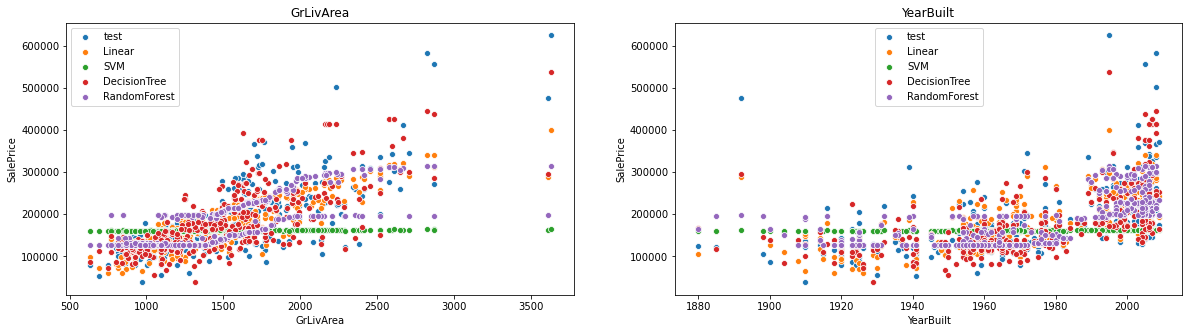

In [35]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(121, title='GrLivArea', xlabel='GrLivArea', ylabel='SalePrice')
ax1 = sns.scatterplot(X_test[:, 0], y_test, label="test")
ax1 = sns.scatterplot(X_test[:, 0], y_pred_lin, label="Linear")
ax1 = sns.scatterplot(X_test[:, 0], y_pred_svm, label="SVM")
ax1 = sns.scatterplot(X_test[:, 0], y_pred_dtc, label="DecisionTree")
ax1 = sns.scatterplot(X_test[:, 0], y_pred_rf, label="RandomForest")

ax2 = fig.add_subplot(122, title='YearBuilt', xlabel='YearBuilt', ylabel='SalePrice')
ax2 = sns.scatterplot(X_test[:, 1], y_test, label="test")
ax2 = sns.scatterplot(X_test[:, 1], y_pred_lin, label="Linear")
ax2 = sns.scatterplot(X_test[:, 1], y_pred_svm, label="SVM")
ax2 = sns.scatterplot(X_test[:, 1], y_pred_dtc, label="DecisionTree")
ax2 = sns.scatterplot(X_test[:, 1], y_pred_rf, label="RandomForest")

plt.legend()
plt.show()

### ・考察
平均二乗誤差が最も小さかったのは線形回帰、最も大きかったのはSVM、決定木とランダムフォレストは同等の結果。<br>
また、可視化した図を見ると、SVM以外はtestデータに近いプロットだが、SVMだけ横一直線となっている。アルゴリズムの理解がまだ出来ていないが、SVMは他との挙動が異なっていることから、うまく学習が出来ていない可能性も考えられる。<br>

# 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。

### ・追加する特徴量を選定する。

In [36]:
import missingno as msno

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

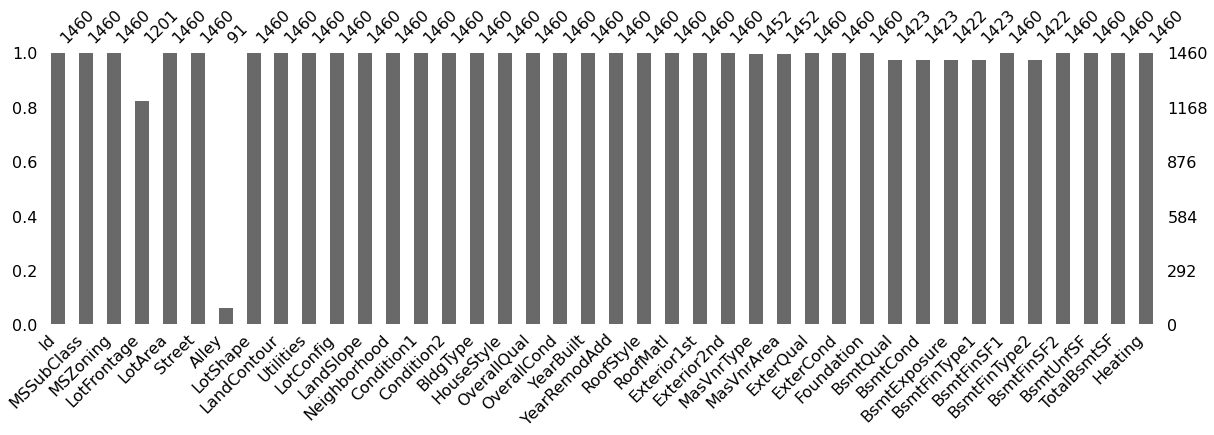

In [38]:
msno.bar(df.iloc[:, :40], figsize=(20, 5))
plt.show()

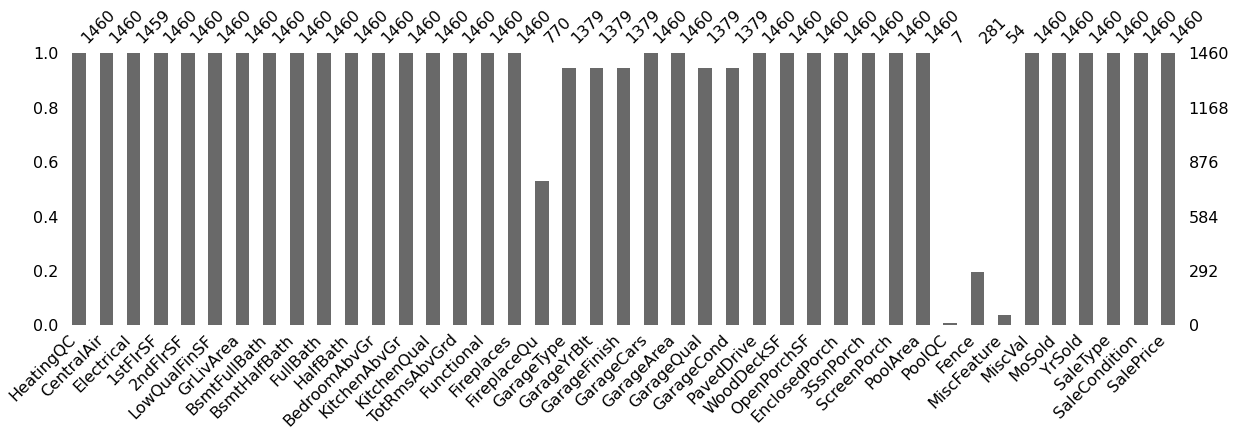

In [39]:
msno.bar(df.iloc[:, 40:], figsize=(20, 5))
plt.show()

In [40]:
# 特徴量に関する相関係数行列を作る
corr_df = df.corr(method='pearson')
corr_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [41]:
#目的変数との相関の高い特徴量10個を抽出
high_corr_columns = abs(corr_df["SalePrice"]).sort_values(ascending=False)[:11].index.values
df[high_corr_columns]

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,2000
1456,210000,6,2073,2,500,1542,2073,2,7,1978,1988
1457,266500,7,2340,1,252,1152,1188,2,9,1941,2006
1458,142125,5,1078,1,240,1078,1078,1,5,1950,1996


In [42]:
#相関の高い特徴量10個だけの相関数行列を作成
high_corr_df = df[high_corr_columns].corr(method='pearson')
high_corr_df

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855


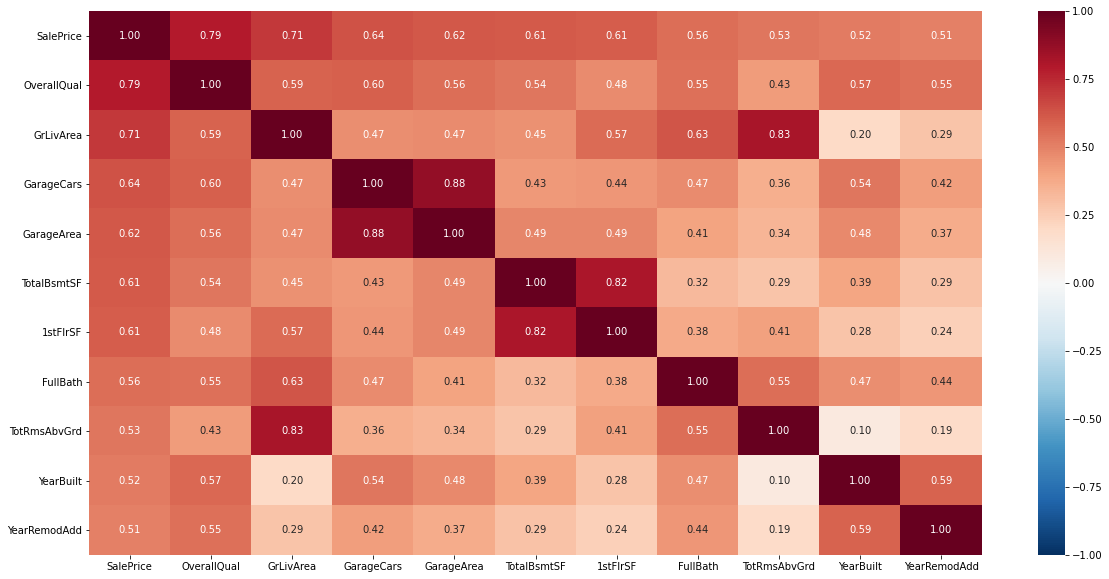

In [43]:
# 相関の高い特徴量10個だけの相関係数行列ヒートマップを作成
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(high_corr_df, vmin=-1.0, vmax=1.0, center=0, annot=True, fmt='.2f', cmap="RdBu_r")
plt.show()

### SalePriceと最も相関が高い説明変数は、OverallQual：全体的な材料と仕上げの品質　であり、欠損値も無いことから、追加する特徴量として選定する。

### ・OverallQualを特徴量に追加して検証する

In [44]:
X = df[["GrLivArea", "YearBuilt", "OverallQual"]] #データを抜き出し
X

,GrLivArea,YearBuilt,OverallQual
0,1710,2003,7
1,1262,1976,6
2,1786,2001,7
3,1717,1915,7
4,2198,2000,8
...,...,...,...
1455,1647,1999,6
1456,2073,1978,6
1457,2340,1941,7
1458,1078,1950,5


In [45]:
# 訓練データと検証データの分割。訓練データ75%、検証データ25%として分割する。
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(1095, 3)

(365, 3)

(1095,)

(365,)

In [46]:
scaler.fit(X_train) #訓練用のデータでfit
X_train_std = scaler.transform(X_train) #訓練用データをtransform
X_train_std

array([[-0.61368407, -0.28203461, -0.77564624],
       [-1.52093745, -0.77301696, -0.77564624],
       [-0.55998949,  0.63446578,  0.64702149],
       ...,
       [ 1.17860423, -0.08564167,  0.64702149],
       [-1.39132982,  0.04528696, -0.77564624],
       [-0.55813795, -0.9694099 , -0.06431238]])

In [47]:
X_test_std = scaler.transform(X_test) #検証用データをtransform
X_test_std

array([[ 0.95456819,  0.9945195 ,  0.64702149],
       [ 0.4713169 , -2.31142832, -1.4869801 ],
       [ 0.34911543,  1.09271597,  0.64702149],
       ...,
       [-0.17486969, -0.2165703 , -0.06431238],
       [ 1.09713658, -0.05290951, -0.06431238],
       [-1.21358222,  0.2416799 , -0.77564624]])

### 線形回帰

In [48]:
reg = LinearRegression().fit(X_train_std, y_train) #学習
y_pred_lin = reg.predict(X_test_std) #推定
y_pred_lin #結果

array([249414.71687297, 106455.78895943, 231475.81169883, 251571.81963437,
       141863.72024564, 220875.20479517, 301026.90354704, 148036.89657894,
       125466.97333786, 147507.44569786, 145614.87840617, 262905.44706806,
       168868.29657961, 117305.99759726, 257606.17552396, 150505.96089702,
       162224.93346457, 285231.94134217, 261827.23059421, 179986.22647996,
       149373.40353329, 214526.49796618, 113573.50218235, 175029.79719221,
       237801.69245604, 139484.98268132, 189846.53595664, 201708.85438809,
       107185.98579069, 156707.53847763, 132957.61393822, 216335.94317902,
       124372.84559513, 205329.53660482, 283651.3534548 , 219088.5856541 ,
       167873.2021846 , 363041.41277932, 165183.60719335, 102449.39951481,
       121170.76074702, 223899.29754286, 180619.16390693, 174850.01330073,
       186102.96241269,  86160.30247906, 234083.02664694, 234814.99742163,
       262769.01600707, 109703.90589276, 201459.56037357, 182803.92587993,
       152209.83790091, 1

In [49]:
#検証データと推定結果の平均二乗誤差
mean_squared_error(y_test, y_pred_lin)

1521452978.472599

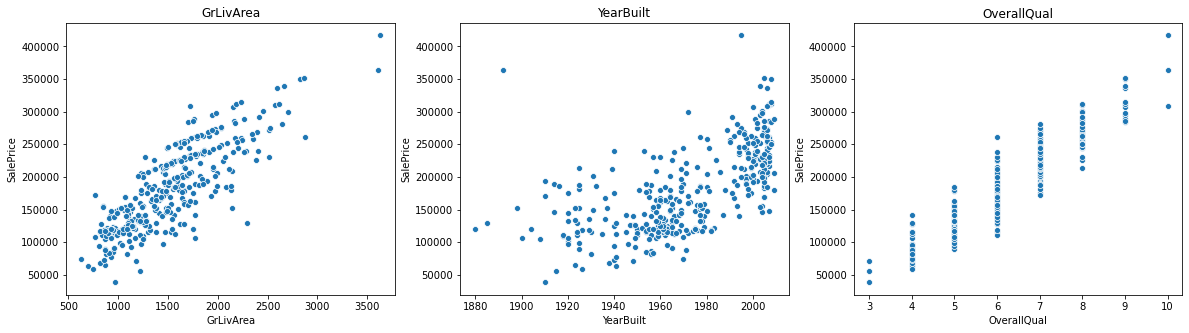

In [50]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131, title='GrLivArea', xlabel='GrLivArea', ylabel='SalePrice')
ax1 = sns.scatterplot(X_test[:, 0], y_pred_lin)

ax2 = fig.add_subplot(132, title='YearBuilt', xlabel='YearBuilt', ylabel='SalePrice')
ax2 = sns.scatterplot(X_test[:, 1], y_pred_lin)

ax3 = fig.add_subplot(133, title='OverallQual', xlabel='OverallQual', ylabel='SalePrice')
ax3 = sns.scatterplot(X_test[:, 2], y_pred_lin)

### SVM

In [51]:
regr = SVR(C=1.0, kernel='linear', epsilon=0.1)
regr.fit(X_train_std, y_train) #学習
y_pred_svm = regr.predict(X_test_std) #推定
y_pred_svm #結果

array([163471.76936777, 159597.99423863, 163165.05013819, 163481.46502828,
       160775.53542827, 162965.53996726, 164521.65154506, 161248.34798296,
       160652.35253316, 161520.4032619 , 161453.88155374, 163680.57191638,
       161949.43206167, 160550.26175196, 163409.62112708, 161061.79744677,
       161313.25835833, 164255.28268712, 163814.79112995, 161736.34596098,
       161211.69712112, 162557.63098583, 160294.59949103, 161237.43337735,
       163253.20485467, 161235.50505748, 162261.84951796, 162505.70749434,
       160256.78873068, 161421.83577937, 160824.23354508, 162911.01056048,
       160590.55717003, 162724.4645726 , 164283.44139012, 162931.91465755,
       161796.79340876, 164630.32613887, 161395.94646811, 159776.21292839,
       160777.51098905, 163053.35770491, 161707.0550639 , 162000.20700507,
       161985.37716839, 159792.86481555, 163245.02197024, 163124.88778338,
       163811.91453981, 159892.14576589, 162480.41403106, 162211.70947739,
       161223.87743935, 1

In [52]:
#検証データと推定結果の平均二乗誤差
mean_squared_error(y_test, y_pred_svm)

6289248172.767675

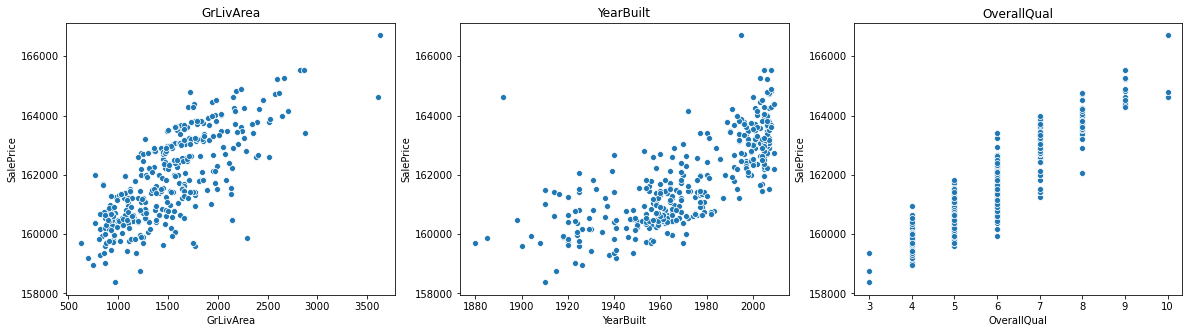

In [53]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131, title='GrLivArea', xlabel='GrLivArea', ylabel='SalePrice')
ax1 = sns.scatterplot(X_test[:, 0], y_pred_svm)

ax2 = fig.add_subplot(132, title='YearBuilt', xlabel='YearBuilt', ylabel='SalePrice')
ax2 = sns.scatterplot(X_test[:, 1], y_pred_svm)

ax3 = fig.add_subplot(133, title='OverallQual', xlabel='OverallQual', ylabel='SalePrice')
ax3 = sns.scatterplot(X_test[:, 2], y_pred_svm)

### 決定木

In [54]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train_std, y_train) #学習
y_pred_dtc = regressor.predict(X_test_std) #推定
y_pred_dtc #結果

array([222500.        ,  95000.        , 133750.        , 205000.        ,
       153500.        , 214000.        , 340000.        , 135875.        ,
       145000.        , 155000.        , 155000.        , 215000.        ,
       145000.        , 139000.        , 250000.        , 140000.        ,
       175000.        , 275500.        , 297000.        , 173000.        ,
       156000.        , 280000.        , 142125.        , 149000.        ,
       223500.        ,  85000.        , 217000.        , 186500.        ,
       129000.        , 148000.        , 147500.        , 194201.        ,
       132500.        , 224000.        , 320000.        , 186000.        ,
       153900.        , 755000.        , 166000.        , 120000.        ,
       112500.        , 241000.        , 167000.        , 164000.        ,
       190000.        , 111000.        , 248328.        , 199900.        ,
       319000.        , 139000.        , 200500.        , 169990.        ,
       145000.        , 1

In [55]:
#検証データと推定結果の平均二乗誤差
mean_squared_error(y_test, y_pred_dtc)

1977378981.115373

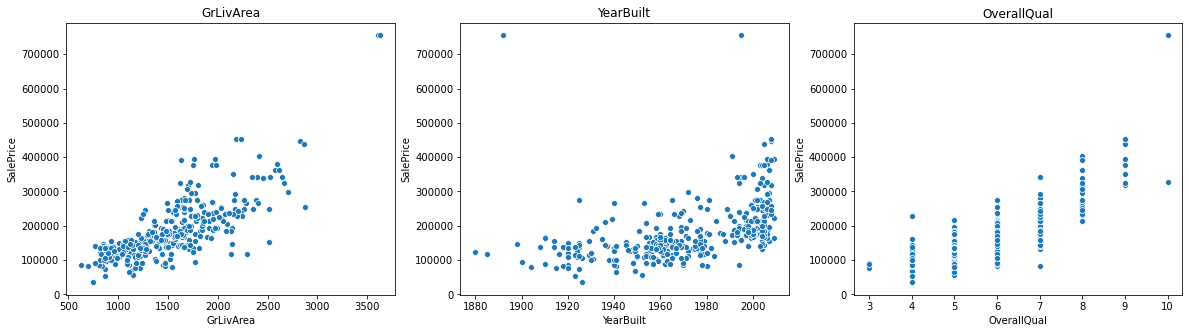

In [56]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131, title='GrLivArea', xlabel='GrLivArea', ylabel='SalePrice')
ax1 = sns.scatterplot(X_test[:, 0], y_pred_dtc)

ax2 = fig.add_subplot(132, title='YearBuilt', xlabel='YearBuilt', ylabel='SalePrice')
ax2 = sns.scatterplot(X_test[:, 1], y_pred_dtc)

ax3 = fig.add_subplot(133, title='OverallQual', xlabel='OverallQual', ylabel='SalePrice')
ax3 = sns.scatterplot(X_test[:, 2], y_pred_dtc)

### ランダムフォレスト

In [57]:
regr_rf = RandomForestRegressor(max_depth=2, random_state=0)
regr_rf.fit(X_train_std, y_train) #学習
y_pred_rf = regr_rf.predict(X_test_std) #推定
y_pred_rf #結果

array([200514.00364997, 148338.36374306, 200514.00364997, 201640.89166881,
       148338.36374306, 200514.00364997, 314128.84889515, 140342.41109293,
       132772.57940101, 132772.57940101, 132772.57940101, 288045.94160336,
       140342.41109293, 132772.57940101, 201640.89166881, 148338.36374306,
       148338.36374306, 309874.43357358, 278899.01014051, 155908.19543499,
       140342.41109293, 200514.00364997, 132772.57940101, 200514.00364997,
       200514.00364997, 132772.57940101, 155908.19543499, 155908.19543499,
       132772.57940101, 140342.41109293, 134896.73964239, 198778.10963944,
       134328.0163128 , 191222.54155938, 305198.77112321, 200514.00364997,
       141897.84800473, 379012.9790172 , 151387.58926143, 132772.57940101,
       132772.57940101, 200514.00364997, 155908.19543499, 142466.57133432,
       155908.19543499, 132772.57940101, 200514.00364997, 200514.00364997,
       283188.27370693, 134896.73964239, 155908.19543499, 142466.57133432,
       141514.00589638, 1

In [58]:
#検証データと推定結果の平均二乗誤差
mean_squared_error(y_test, y_pred_rf)

2030722597.4411159

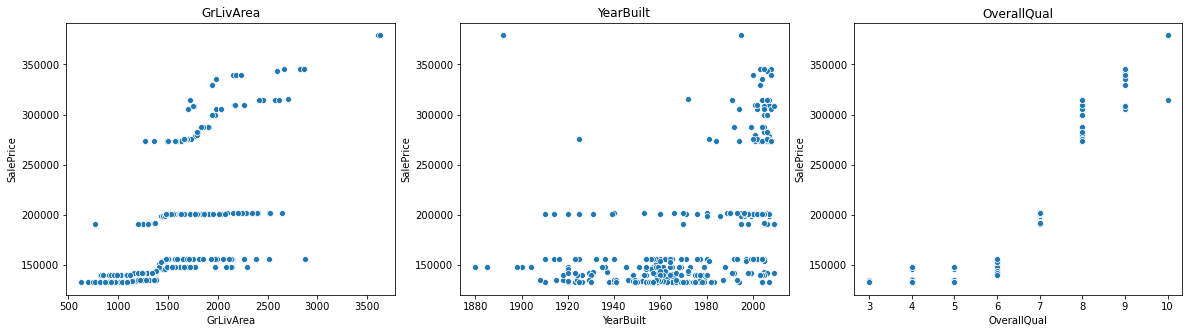

In [59]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131, title='GrLivArea', xlabel='GrLivArea', ylabel='SalePrice')
ax1 = sns.scatterplot(X_test[:, 0], y_pred_rf)

ax2 = fig.add_subplot(132, title='YearBuilt', xlabel='YearBuilt', ylabel='SalePrice')
ax2 = sns.scatterplot(X_test[:, 1], y_pred_rf)

ax3 = fig.add_subplot(133, title='OverallQual', xlabel='OverallQual', ylabel='SalePrice')
ax3 = sns.scatterplot(X_test[:, 2], y_pred_rf)

In [60]:
#平均二乗誤差まとめ
df_index_conclusion_2 = pd.DataFrame([[1521452978.472599],
                                                                    [6289248172.767675],
                                                                    [1977378981.115373],
                                                                    [2030722597.4411159]])

df_index_conclusion_1 = pd.DataFrame([[1983765930.598885],
                                                                    [6467238825.281772],
                                                                    [2396611387.3850837],
                                                                    [2555364507.4243336]])

df_index_conclusion_3 = round((1 - df_index_conclusion_2 / df_index_conclusion_1)*100, 1)

df_index_conclusion = pd.concat([df_index_conclusion_1, df_index_conclusion_2, df_index_conclusion_3], axis=1)

df_index_conclusion.index = ["線形回帰", "SVM", "決定木", "ランダムフォレスト"]
df_index_conclusion.columns = ["平均二乗誤差（OverallQual無し）", "平均二乗誤差（OverallQual有り）", "向上率[％]"]
df_index_conclusion

,平均二乗誤差（OverallQual無し）,平均二乗誤差（OverallQual有り）,向上率[％]
線形回帰,1.983766e+09,1.521453e+09,23.3
SVM,6.467239e+09,6.289248e+09,2.8
決定木,2.396611e+09,1.977379e+09,17.5
ランダムフォレスト,2.555365e+09,2.030723e+09,20.5


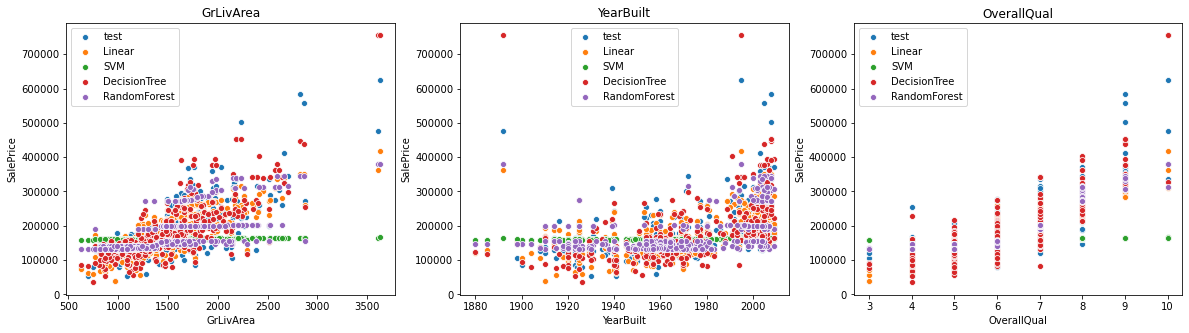

In [61]:
#図まとめ
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131, title='GrLivArea', xlabel='GrLivArea', ylabel='SalePrice')
ax1 = sns.scatterplot(X_test[:, 0], y_test, label="test")
ax1 = sns.scatterplot(X_test[:, 0], y_pred_lin, label="Linear")
ax1 = sns.scatterplot(X_test[:, 0], y_pred_svm, label="SVM")
ax1 = sns.scatterplot(X_test[:, 0], y_pred_dtc, label="DecisionTree")
ax1 = sns.scatterplot(X_test[:, 0], y_pred_rf, label="RandomForest")

ax2 = fig.add_subplot(132, title='YearBuilt', xlabel='YearBuilt', ylabel='SalePrice')
ax2 = sns.scatterplot(X_test[:, 1], y_test, label="test")
ax2 = sns.scatterplot(X_test[:, 1], y_pred_lin, label="Linear")
ax2 = sns.scatterplot(X_test[:, 1], y_pred_svm, label="SVM")
ax2 = sns.scatterplot(X_test[:, 1], y_pred_dtc, label="DecisionTree")
ax2 = sns.scatterplot(X_test[:, 1], y_pred_rf, label="RandomForest")

ax3 = fig.add_subplot(133, title='OverallQual', xlabel='OverallQual', ylabel='SalePrice')
ax3 = sns.scatterplot(X_test[:, 2], y_test, label="test")
ax3 = sns.scatterplot(X_test[:, 2], y_pred_lin, label="Linear")
ax3 = sns.scatterplot(X_test[:, 2], y_pred_svm, label="SVM")
ax3 = sns.scatterplot(X_test[:, 2], y_pred_dtc, label="DecisionTree")
ax3 = sns.scatterplot(X_test[:, 2], y_pred_rf, label="RandomForest")

plt.legend()
plt.show()

### ・考察
OverallQualを追加したことで、平均二乗誤差は全ての手法にて小さくなり、精度が2.8~23.3%向上した。<br>
可視化した図は大きくは変わらず、やはりSVMだけ横一直線となっている。<br>